This notebook will walk us through creating partial dependence plots using the scikit-learn library.  While not as robust as pdpbox, it can provide a more convenient way of accessing the same type of charts.

You can see a writeup of the module here:  https://scikit-learn.org/stable/modules/partial_dependence.html

For convenience sake, we'll use the functionality on the insurance dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv(r"C:\Users\Jonat\dat-master\Homework\Unit3\data\insurance_premiums.csv")

pipe = make_pipeline(
        ce.OneHotEncoder(use_cat_names=True),
        GradientBoostingRegressor()
    )

X = df.drop('charges', axis=1)
y = df['charges']

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit the model -- notice we are doing the separate encoding steps -- necessary for the library to function
X_train = pipe[0].fit_transform(X_train, y_train)
pipe[1].fit(X_train, y_train)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GradientBoostingRegressor()

In [5]:
# import the partial dependence
from sklearn.inspection import plot_partial_dependence

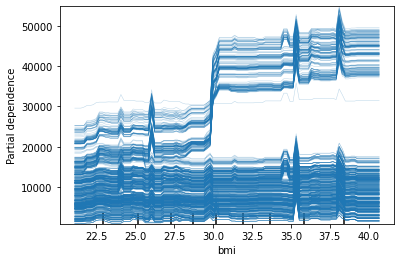

In [25]:
# partial dependence for a single column w/ ice lines
plot_partial_dependence(pipe[1], X_train, ['bmi'], kind='individual');

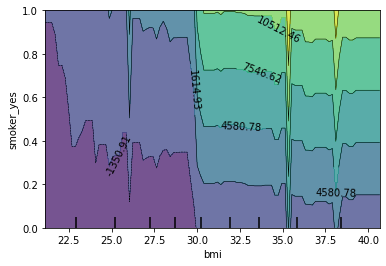

In [31]:
# and for interactions -- between BMI and smoking
plot_partial_dependence(pipe[1], X_train, [('bmi', 'smoker_yes')]);